In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assignment 2 - Task 1
---------------

In [2]:
data = pd.read_csv("ratdataNormChecked.csv")
data = data[[ "liverind", "heartind", "appind", "batind", "tailind", "ADWBind", "gonind", "BMI"]]
data

,liverind,heartind,appind,batind,tailind,ADWBind,gonind,BMI
0,0.036364,0.005091,0.013636,0.001864,0.714286,0.454545,0.000000,0.199546
1,0.010440,0.004396,0.008791,0.000742,0.666667,0.302198,1.648659,0.478632
2,0.051200,0.006133,0.020800,0.001467,0.904762,0.653333,0.000000,0.340136
3,0.047333,0.005556,0.105111,0.002178,0.869565,0.260000,2.653242,0.340265
4,0.052558,0.005349,0.021628,0.001884,0.720000,0.500000,0.000000,0.275200
...,...,...,...,...,...,...,...,...
556,0.067738,0.003507,0.013552,0.002602,0.808163,0.372172,1.742219,0.736360
557,0.078575,0.003667,0.014667,0.001035,0.777273,0.381090,1.064711,0.788843
558,0.079303,0.003918,0.014760,0.001337,0.760870,0.469952,0.993252,0.786389
559,0.080693,0.004286,0.008803,0.001592,0.714286,0.380252,1.512927,0.793003


## a)

In [3]:
Kvals = [2, 3, 4, 5, 6, 7, 8]

In [4]:
# single link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='single').fit(data)
    SI = silhouette_score(data, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.657, 2)

In [5]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='single').fit(data)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 560, 1: 1}

In [6]:
# complete link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='complete').fit(data)
    SI = silhouette_score(data, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.597, 2)

In [7]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='complete').fit(data)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 535, 1: 26}

In [8]:
# average link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='average').fit(data)
    SI = silhouette_score(data, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.597, 2)

In [9]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='average').fit(data)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 535, 1: 26}

In [10]:
# Ward's method clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='ward').fit(data)
    SI = silhouette_score(data, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.546, 3)

In [11]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='ward').fit(data)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 302, 1: 233, 2: 26}

##  b)

(561, 1)


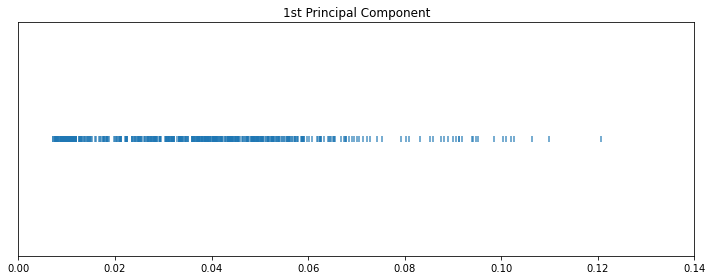

In [32]:
# Perform PCA and present the data using only the first principal component.
pca = PCA(n_components=1).fit(data.values.T)
pc1 = pca.components_.T
print(pc1.shape)

fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.scatter(pc1, np.zeros_like(pc1), alpha=0.8, marker='|')
ax.axes.yaxis.set_visible(False)
ax.set_title("1st Principal Component")
ax.set_xlim(0, 0.14)
fig.tight_layout()

In [13]:
# Repeat the same tests as in a) and report the best clusterings.

In [14]:
# single link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='single').fit(pc1)
    SI = silhouette_score(pc1, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.679, 2)

In [15]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='single').fit(pc1)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 560, 1: 1}

In [16]:
# complete link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='complete').fit(pc1)
    SI = silhouette_score(pc1, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.626, 2)

In [17]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='complete').fit(pc1)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 535, 1: 26}

In [18]:
# average link clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='average').fit(pc1)
    SI = silhouette_score(pc1, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.626, 2)

In [19]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='average').fit(pc1)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 535, 1: 26}

In [20]:
# Ward's method clustering
best_K = None
best_SI = -1
for K in Kvals:
    clustering = AgglomerativeClustering(n_clusters=K,
                                         affinity='euclidean', 
                                         linkage='ward').fit(pc1)
    SI = silhouette_score(pc1, clustering.labels_)
    if SI > best_SI:
        best_K = K
        best_SI = SI
        
np.round(best_SI, 3), best_K

(0.594, 4)

In [21]:
clustering = AgglomerativeClustering(n_clusters=best_K,
                                     affinity='euclidean', 
                                     linkage='ward').fit(pc1)
arr = clustering.labels_
occurences = {}
for i in range(best_K):
    occurences[i] = arr[arr==i].shape[0]
occurences

{0: 185, 1: 198, 2: 152, 3: 26}

## c)

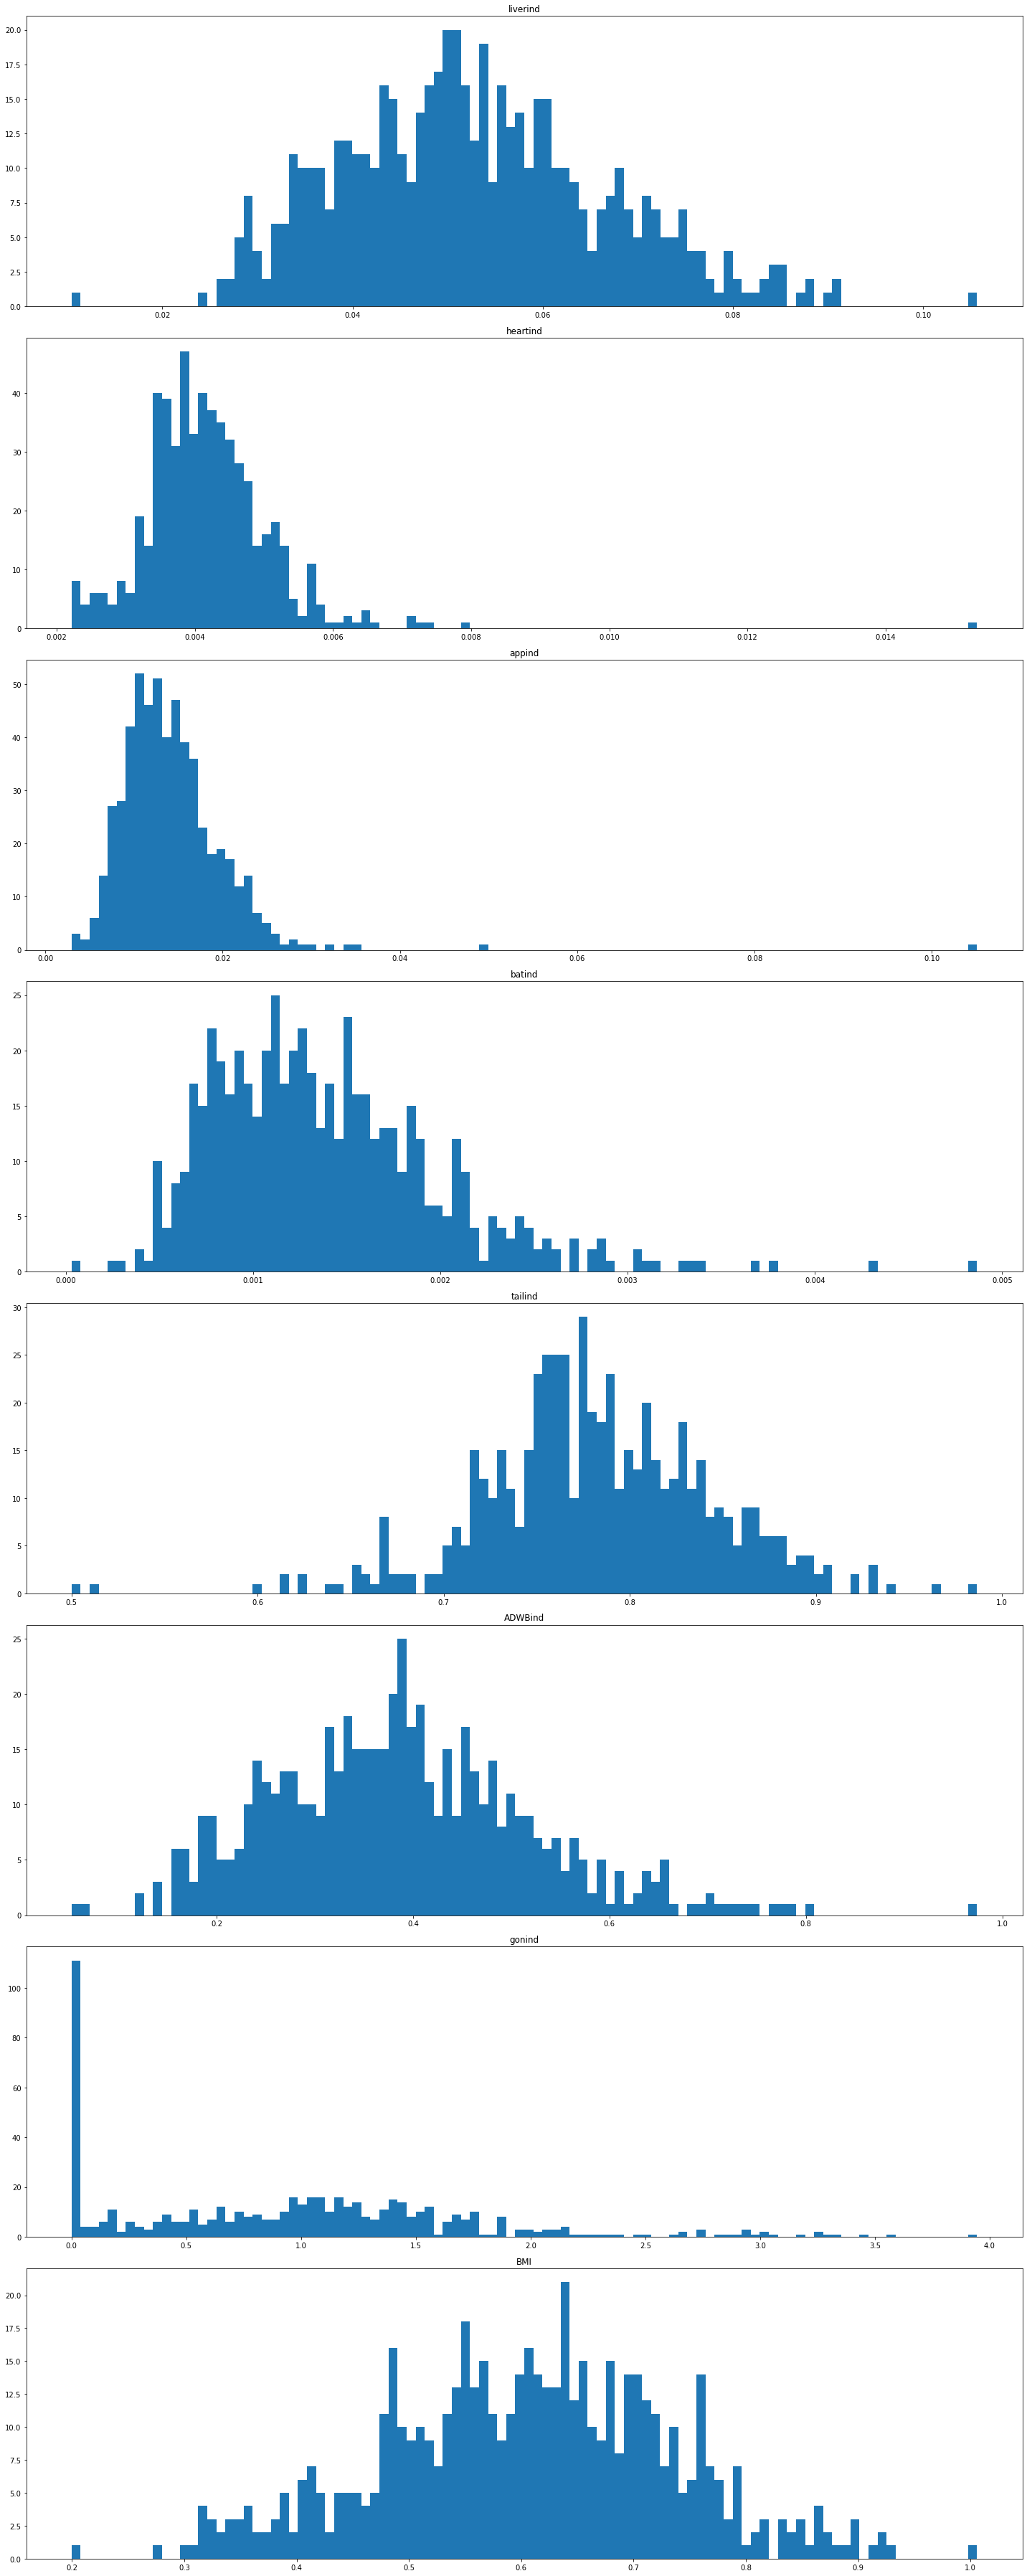

In [54]:
fig, ax = plt.subplots(len(data.columns), figsize=(20,50))
for i, feature in enumerate(data.columns):
    ax[i].hist(data[feature], bins=100)
    ax[i].set_title(feature)
fig.tight_layout()